# NLP Sentiment Analysis from Amazon Item Reviews

Team:
1. Faraday Barr Fatahillah (1103213028)
2. Muhammad Farrel Ahadi Tama (110321)
3. Muhamad Hilmi Haidar (1103213005)


This project is for Assistant Lab Recruitment for i-Smile Laboratory

## Get Data

you can get the data from here:
https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/input

In [ ]:
# from zipfile import ZipFile

# with ZipFile('C:\\Users\\BOBEh\\Documents\\SentimentAnalysis_NLP\\Reviews.csv.zip', 'r') as zObject:
#     zObject.extractall(path='C:\\Users\\BOBEh\\Documents\\SentimentAnalysis_NLP')

In [28]:
import pandas as pd
df = pd.read_csv('Reviews.csv')[:2000]
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      2000 non-null   int64 
 1   ProductId               2000 non-null   object
 2   UserId                  2000 non-null   object
 3   ProfileName             2000 non-null   object
 4   HelpfulnessNumerator    2000 non-null   int64 
 5   HelpfulnessDenominator  2000 non-null   int64 
 6   Score                   2000 non-null   int64 
 7   Time                    2000 non-null   int64 
 8   Summary                 2000 non-null   object
 9   Text                    2000 non-null   object
dtypes: int64(5), object(5)
memory usage: 156.4+ KB


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

### Quick EDA

Text(0, 0.5, 'Count')

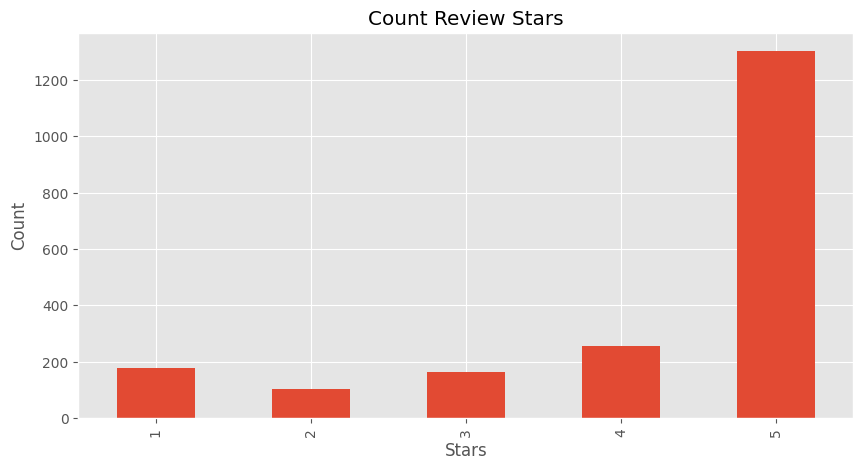

In [30]:
data = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count Review Stars', figsize=(10,5))
data.set_xlabel('Stars')
data.set_ylabel('Count')

## Preprocessing Data 

### Clean Text

In [31]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'(.)\1+', r'\1\1', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_token = [word for word in tokens if word not in stop_words]
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token) for token in filtered_token]
    
    clean = ' '.join(lemmatized)
    
    return clean

for i in range(len(df)):
    df['Text'][i] = preprocess(df['Text'][i])
    df['Summary'][i] = preprocess(df['Summary'][i])


df.head()
    
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BOBEh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BOBEh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BOBEh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\BOBEh\AppData\Local\Temp\ipykernel_17248\1928129629.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'][i] = preprocess(df['Text'][i])
C:\Users\BOBEh\AppData\Local\Temp\ipykernel_17248\1928129629.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,advertised,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,delight say,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy great price wide assortment yummy ...


#### POS Tagging

In [32]:
nltk.download('averaged_perceptron_tagger')
# example = df['Text'][10]
# print(example)
# tokens = nltk.word_tokenize(example)
# print(tokens)
# tagged = nltk.pos_tag(tokens)
# print(tagged)

df['POS Tag'] = nltk.pos_tag(df['Text'])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BOBEh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Sentiment Scoring VADER

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

sia.polarity_scores("This is the best")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BOBEh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}

In [34]:
sia.polarity_scores("This is really bad")

{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5849}

In [35]:
from tqdm import tqdm

rev = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    id = row['Id']
    rev[id] = sia.polarity_scores(text)


# tite = {}
# for i, row in tqdm(df.iterrows(), total=len(df)):
#     text = row['Summary']
#     id = row['Id']
#     tite[id] = sia.polarity_scores(text)


































100%|██████████| 2000/2000 [00:01<00:00, 1739.62it/s]


In [38]:
vaders = pd.DataFrame(rev).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,POS Tag
0,1,0.000,0.503,0.497,0.9413,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,bought several vitality canned dog food produc...,(bought several vitality canned dog food produ...
1,2,0.129,0.762,0.110,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,advertised,product arrived labeled jumbo salted peanutsth...,(product arrived labeled jumbo salted peanutst...
2,3,0.132,0.576,0.292,0.8624,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,delight say,confection around century light pillowy citrus...,(confection around century light pillowy citru...
3,4,0.000,0.854,0.146,0.4404,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,looking secret ingredient robitussin believe f...,(looking secret ingredient robitussin believe ...
4,5,0.000,0.369,0.631,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy great price wide assortment yummy ...,(great taffy great price wide assortment yummy...


### Vader Result

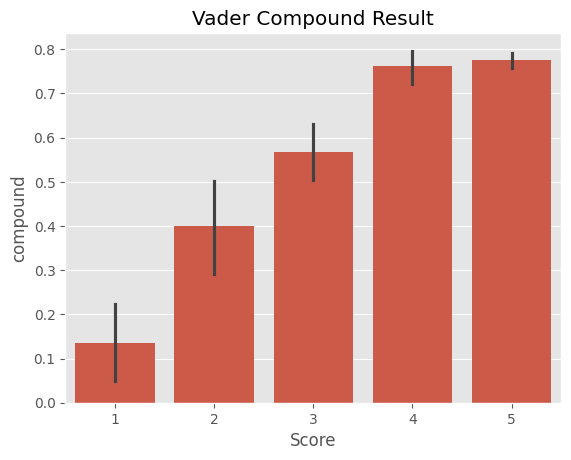

In [45]:
plot = sns.barplot(data=vaders, x='Score', y='compound')
plot.set_title('Vader Compound Result')
plt.show()

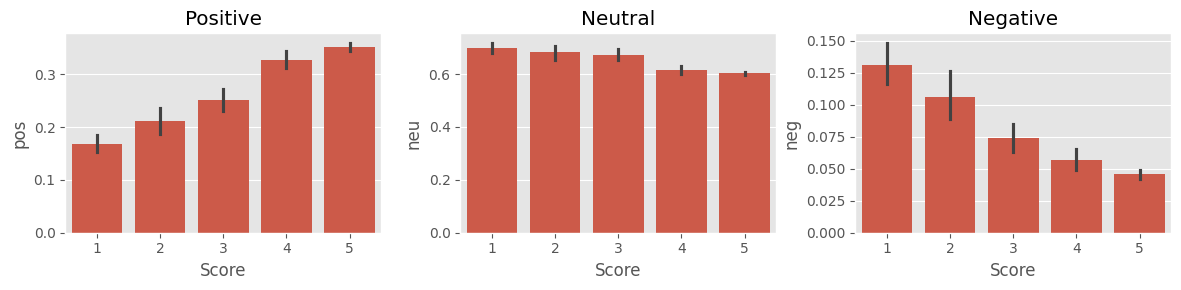

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.info()

In [ ]:
df['Bintang'].value_counts()

In [ ]:
#Shape of Datasets, Breakdown the Classes
print(f"Input data memiliki {len(df)} baris dan {len(df.columns)} kolom")
print(f"Bintang 1.0 = {len(df[df['Bintang']==1.0])} baris")
print(f"Bintang 2.0 = {len(df[df['Bintang']==2.0])} baris")
print(f"Bintang 3.0 = {len(df[df['Bintang']==3.0])} baris")
print(f"Bintang 4.0 = {len(df[df['Bintang']==4.0])} baris")
print(f"Bintang 5.0 = {len(df[df['Bintang']==5.0])} baris")

In [ ]:
#Mencari Missing Values dalam dataset
print(f"Jumlah Null dalam Review : {df['Review'].isnull().sum()}")
print(f"Jumlah Null dalam Bintang : {df['Bintang'].isnull().sum()}")
sns.countplot(x='Bintang', data=df )

In [ ]:
df_numerik = df.select_dtypes(include=['int', 'float'])
df_kategori = df.select_dtypes(include=['object'])
for column in df_numerik.columns:
 plt.figure(figsize=(3, 3))
 plt.hist(df[column], bins=30, edgecolor='black')
 plt.title(f'Histogram {column}')
 plt.xlabel(f'{column}')
 plt.ylabel('Frekuensi')
 plt.show()

## Wordcloud Visualization

In [ ]:
from wordcloud import WordCloud


In [ ]:
df_negative = df[ (df['Bintang']==1.0) | (df['Bintang']==2.0) | (df['Bintang']==3.0)]
df_positive = df[ (df['Bintang']==4.0) | (df['Bintang']==5.0)]
#convert to list
negative_list = df_negative['clean_text'].tolist()
positive_list = df_positive['clean_text'].tolist()

filtered_negative = ("").join(str(negative_list))
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list))
filtered_positive = filtered_positive.lower()

Positive WordCloud

In [ ]:
wordcloud = WordCloud(max_font_size = 160,margin = 0, background_color = "white", colormap = "Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Words")
plt.show()

Negative WordCloud

In [ ]:
wordcloud = WordCloud(max_font_size = 160,margin = 0, background_color = "white", colormap = "Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Words")
plt.show()

## Feature Extraction from Text

## Confusion Matrix Visualization